In [1]:
#1
arr = [0.001 for i in range(10**7)]

In [2]:
s = 0
for t in arr:
    s += t
print(s)
print(sum(arr))

10000.000001578517
10000.000001578517


In [3]:
value = 10**7*0.001
err = abs(s - value)
print(err)
print(err/value*100,'%')

1.5785171854076907e-06
1.5785171854076907e-08 %


In [4]:
err =[]
length=200
n = [25 * i for i in range(1,length)]
value=0
for i in range(1,length):
    arr=[0.001 for j in range(25000*i)]
    result = i * 25
    s=sum(arr)
    err.append(abs(s-n[i-1]))

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import math

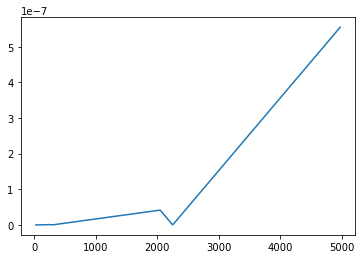

In [6]:
plt.plot(n,err)
plt.show()

In [7]:
def treeSum(arr,a,b):
    if a<b:
        m = (a+b)//2
        return treeSum(arr,a,m-1)+treeSum(arr,m+1,b)+arr[m]
    elif a==b:
        return arr[a]
    else:
        return 0

In [8]:
arr = [0.001 for i in range(10**7)]

In [9]:
x=treeSum(arr,0,10**7-1)
print(x)

10000.000000000004


In [10]:
value = 10**7*0.001
err = abs(x - value)
print(err)
print(err/value*100,'%')

3.637978807091713e-12
3.637978807091713e-14 %


In [11]:
start1=datetime.datetime.now()
x=treeSum(arr,0,10**7-1)
start2=datetime.datetime.now()
print("TreeSum time:\t\t",start2-start1)
x=sum(arr)
stop=datetime.datetime.now()
print("Normal sum time:\t",stop-start2)

TreeSum time:		 0:00:02.514128
Normal sum time:	 0:00:00.039856


In [12]:
#2 Algorytm Kahana
def Kahan(arr):
    sum = 0.0
    err = 0.0
    for i in range(len(arr)):
        y = arr[i] - err
        temp = sum + y
        err = (temp - sum) - y
        sum = temp
    return sum

In [13]:
result=Kahan(arr)
print(result)

10000.0


In [14]:
value = 10**7*0.001
err = abs(result - value)
print(err)
print(err/value*100,'%')

0.0
0.0 %


In [15]:
start1=datetime.datetime.now()
x=treeSum(arr,0,10**7-1)
start2=datetime.datetime.now()
print("TreeSum time:\t",start2-start1)
x=Kahan(arr)
stop=datetime.datetime.now()
print("Kahan sum time:\t",stop-start2)

TreeSum time:	 0:00:02.546196
Kahan sum time:	 0:00:01.431213


In [16]:
#3 Sumy Częściowe
def dzeta(s,n):
    sum = np.float32(0)
    for i in range(1 , n+1):
        sum += 1/np.power(np.float32(i),s)
    return sum

In [17]:
def eta(s,n):
    sum = np.float32(0)
    for i in range(1 , n+1):
        sum += np.power(-1,i-1)/math.pow(i,s)
    return sum

In [18]:
s = [2,3.6667,5,7.2,10]
n = [50,100,200,500,1000]

In [19]:
#single precision
print("function dzeta")
for i in s:
    print("values for ",i,"\t")
    for j in n:
        print(dzeta(i,j),end="\t")
    print("\n")

function dzeta
values for  2 	
1.625132733621529	1.6349839001848923	1.6399465460149971	1.642936065514894	1.6439345666815615	

values for  3.6667 	
1.1093997551541945	1.1094087973421474	1.1094102423332313	1.1094104908440712	1.1094105108423578	

values for  5 	
1.036927716716712	1.0369277526929555	1.0369277549886775	1.0369277551393863	1.0369277551431222	

values for  7.2 	
1.0072276664762816	1.007227666480654	1.0072276664807145	1.0072276664807145	1.0072276664807145	

values for  10 	
1.0009945751278182	1.0009945751278182	1.0009945751278182	1.0009945751278182	1.0009945751278182	



In [20]:
#single precision
print("function eta")
for i in s:
    print("values for ",i,"\t")
    for j in n:
        print(eta(i,j),end="\t")
    print("\n")

function eta
values for  2 	
0.8222710318260295	0.8224175333741286	0.822454595922551	0.8224650374240963	0.8224665339241114	

values for  3.6667 	
0.9346930600307106	0.9346933211400662	0.9346933421086845	0.9346933438558745	0.9346933439141353	

values for  5 	
0.9721197689267979	0.9721197703981592	0.972119770445367	0.9721197704468947	0.9721197704469091	

values for  7.2 	
0.9935270006613486	0.9935270006616185	0.9935270006616201	0.9935270006616201	0.9935270006616201	

values for  10 	
0.9990395075982718	0.9990395075982718	0.9990395075982718	0.9990395075982718	0.9990395075982718	



In [29]:
#single precision, backward summing
def b_dzeta(s,n):
    sum = np.float32(0)
    for i in range(n , 0,-1):
        sum += 1/np.power(np.float32(i),s)
    return sum
print("function dzeta")
for i in s:
    print("values for ",i,"\t")
    for j in n:
        print(b_dzeta(i,j),end="\t")
    print("\n")

function dzeta
values for  2 	
1.6251327336215293	1.634983900184893	1.6399465460149973	1.6429360655148941	1.6439345666815597	

values for  3.6667 	
1.1093997551541943	1.1094087973421476	1.109410242333231	1.1094104908440725	1.1094105108423593	

values for  5 	
1.0369277167167108	1.0369277526929532	1.036927754988676	1.0369277551393858	1.0369277551431204	

values for  7.2 	
1.0072276664762823	1.007227666480655	1.0072276664807163	1.0072276664807172	1.0072276664807172	

values for  10 	
1.000994575127818	1.000994575127818	1.000994575127818	1.000994575127818	1.000994575127818	



In [30]:
#single precision, backward summing
def b_eta(s,n):
    sum = np.float32(0)
    for i in range(n,0,-1):
        sum += np.power(-1,i-1)/math.pow(i,s)
    return sum
print("function eta")
for i in s:
    print("values for ",i,"\t")
    for j in n:
        print(b_eta(i,j),end="\t")
    print("\n")

function eta
values for  2 	
0.8222710318260289	0.8224175333741282	0.8224545959225509	0.8224650374240972	0.8224665339241127	

values for  3.6667 	
0.934693060030711	0.934693321140067	0.9346933421086852	0.934693343855875	0.9346933439141354	

values for  5 	
0.9721197689267976	0.9721197703981589	0.9721197704453663	0.9721197704468933	0.9721197704469088	

values for  7.2 	
0.9935270006613481	0.9935270006616179	0.9935270006616198	0.9935270006616198	0.9935270006616198	

values for  10 	
0.9990395075982715	0.9990395075982715	0.9990395075982715	0.9990395075982715	0.9990395075982715	



# Gdy dodaję do siebie składniki sumy od tyłu, okazuje się, że wychodzą one różne od tych sumowanych w kolejności wzoru. Dzieje się tak, gdyż w drugim wypadku, do całkowitej sumy dodaję bardzo małe liczby, zwiększając tym samym błąd wyniku. W drugim wypadku, suma jest na początku bardzo mała i w miarę jej rośnięcia dodaję co raz większe liczby.

In [24]:
#double precision
def dzeta(s,n):
    sum = np.double(0)
    for i in range(1 , n+1):
        sum += np.double(1)/np.power(np.double(i),np.double(s))
    return sum

In [25]:
print("function dzeta")
for i in s:
    print("values for ",i,"\t")
    for j in n:
        print(dzeta(i,j),end="\t")
    print("\n")

function dzeta
values for  2 	
1.625132733621529	1.6349839001848923	1.6399465460149971	1.642936065514894	1.6439345666815615	

values for  3.6667 	
1.1093997551541945	1.1094087973421474	1.1094102423332313	1.1094104908440712	1.1094105108423578	

values for  5 	
1.036927716716712	1.0369277526929555	1.0369277549886775	1.0369277551393863	1.0369277551431222	

values for  7.2 	
1.0072276664762816	1.007227666480654	1.0072276664807145	1.0072276664807145	1.0072276664807145	

values for  10 	
1.0009945751278182	1.0009945751278182	1.0009945751278182	1.0009945751278182	1.0009945751278182	



In [26]:
def eta(s,n):
    sum = np.double(0)
    for i in range(1 , n+1):
        sum += np.power(-1,i)/np.power(np.double(i),np.double(s))
    return sum

In [27]:
print("function eta")
for i in s:
    print("values for ",i,"\t")
    for j in n:
        print(eta(i,j),end="\t")
    print("\n")

function eta
values for  2 	
-0.8222710318260295	-0.8224175333741286	-0.822454595922551	-0.8224650374240963	-0.8224665339241114	

values for  3.6667 	
-0.9346930600307106	-0.9346933211400662	-0.9346933421086845	-0.9346933438558745	-0.9346933439141353	

values for  5 	
-0.9721197689267979	-0.9721197703981592	-0.972119770445367	-0.9721197704468947	-0.9721197704469091	

values for  7.2 	
-0.9935270006613486	-0.9935270006616185	-0.9935270006616201	-0.9935270006616201	-0.9935270006616201	

values for  10 	
-0.9990395075982718	-0.9990395075982718	-0.9990395075982718	-0.9990395075982718	-0.9990395075982718	



In [28]:
def logistic(x,r):
    return r * x * (1 - x)

In [33]:
def logistic32(x,r):
    return np.float32(r * x * (1 - x))

In [34]:
x0=0.001
n=2000

In [35]:
r=np.linspace(1.1,3.9,n)
y=[]
for ri in r:
    x=x0
    for i in range(1,n):
        x=logistic(x,ri)
    y.append(x)

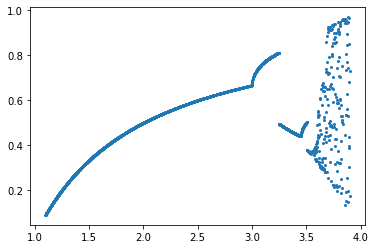

In [36]:
plt.scatter(r,y,s=4)

In [37]:
x0=0.3
n=1000
r=np.linspace(3.75,3.8,n)

In [38]:
#float32
x=np.float32(x0)
X32=[]
for i in range(n):
    x=np.float32(logistic32(x,r[i]))
    X32.append(x)

In [39]:
#float64
x=np.double(x0)
X64=[]
for i in range(n):
    x=np.double(logistic(x,r[i]))
    X64.append(x)

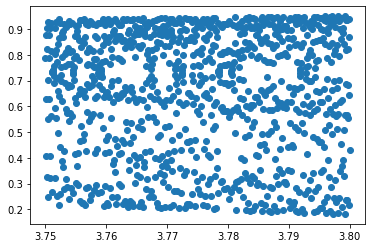

In [43]:
plt.scatter(r,X32)

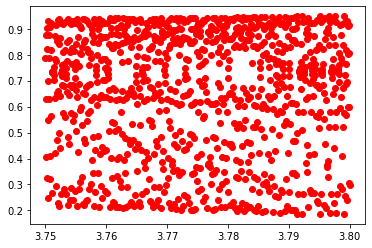

In [45]:
plt.scatter(r,X64,color='red')

# Możemy Zauważyć, że trajektorie obliczone dla obu dokładności są od siebie różne. Wynnika to z faktu iż, zadanie to jest źle uwarunkowane. Niewielka zmiana parametrów r i x0 powoduje znaczące zmiany trajektorii. Wówczas zmiana dokładności reprezentacji liczb zmiennoprzecinkowych powoduje zmiany wyników.

In [46]:
#float32
def iterations_count(x0,r):
    i=0
    while x0!=0:
        x0=logistic32(x0,r)
        i+=1
    return i

In [50]:
iterations_count(0.6,4)

2406

In [54]:
iterations_count(0.7,4)

3010

In [55]:
iterations_count(0.4,4)

2406

In [70]:
iterations_count(0.92,4)

885

In [71]:
iterations_count(0.93,4)

1323

In [72]:
iterations_count(0.94,4)

3416

In [73]:
iterations_count(0.95,4)

3543

In [74]:
iterations_count(0.96,4)

269

In [75]:
iterations_count(0.97,4)

29

In [76]:
iterations_count(0.98,4)

984

In [77]:
iterations_count(0.99,4)

2960

# Możnaby się spodziewać, że wraz z x0 dążącym do 1, liczba iteracji potrzebnych do osiągnięcia 0 będzie spadać. Nie jest to jednak prawda. Możemy zauważyć, że liczba ta rośnie i spada gwałtownie wraz z niewielką zmianą x0. Jest tak dlatego, że odwzorowanie logistyczne powtórzone wielokrotnie jest zadaniem źle uwarunkowanym.